In [15]:
import pandas as pd
import numpy as np
import math

UNCLASSIFIED = False
NOISE = -1

In [48]:
def _dist(p,q):
    # compute and return the euclidean distance
    # put your code here
    distance = np.sqrt(np.sum((p - q) ** 2)) #P,Q需要是ARRAY才可以進行計算
    return distance

In [17]:
def _eps_neighborhood(p,q,eps):
    # check if the distance between p and q is below eps
    # return True or False
    # put your code here
    return (_dist(p,q)<eps)

In [61]:
def _region_query(m, point_id, eps):
    n_points = m.shape[1]
    seeds = []
    # find and return all points that belong to eps-neighborhood of point_id
    # put your code here
    for k in range(n_points):
        temp = []
        fir = np.array([m[0,point_id],m[1,point_id]])
        sec = np.array([m[0,k],m[1,k]])
        if _eps_neighborhood(fir,sec,eps):
            temp.append(k)
        seeds.extend(temp)
    return seeds

In [62]:
def _expand_cluster(m, classifications, point_id, cluster_id, eps, min_points):
    # expand the cluster of cluster_id from point_id
    # identify all points belonging to cluster_id
    # update the clustering results in "classification" by assigning cluster_id to each point
    # return True if point_id is a core, False if point_id is not a core
    # write your code below
    
    seeds = _region_query(m, point_id, eps)
    
    if len(seeds) < min_points:# 透過數量去查看是不是核心點
        classifications[point_id] = NOISE
        return False
    else:
        # 是核心點
        classifications[point_id] = cluster_id
        for seed_id in seeds:
            if classifications[seed_id] == UNCLASSIFIED:
                classifications[seed_id] = cluster_id #先製作SN資料表再去做處理
                result = _expand_cluster(m, classifications, seed_id, cluster_id, eps, min_points)# 繼續擴展領域

        return True

In [67]:
def dbscan(m, eps, min_points):
    """Implementation of DBSCAN
    You can refer to wikipedia for detailed algorithm: https://en.wikipedia.org/wiki/DBSCAN
    Use Euclidean Distance as the measure
    
    Inputs:
    m - A matrix whose columns are feature vectors
    eps - Maximum distance two points can be to be regionally related
    min_points - The minimum number of points to make a cluster
    
    Outputs:
    An array with either a cluster id number or dbscan.NOISE (None) for each column vector in m
    """
    cluster_id = 1
    n_points = m.shape[1]
    classifications = [UNCLASSIFIED] * n_points
    # the main dbscan algorithm
    # put your code here
    for point_id in range(n_points):
        if classifications[point_id] == False: #若尚未標記就去找屬於他的群
            if _expand_cluster(m, classifications, point_id, cluster_id, eps, min_points):
                cluster_id +=1
   
    return classifications

In [68]:
# test here
dataset_1 = pd.read_csv('blobs.csv')[:80].values
m = np.asmatrix(dataset_1)
m = m.transpose()

In [69]:
eps = 1.6
min_points = 5
a = dbscan(m, eps, min_points)

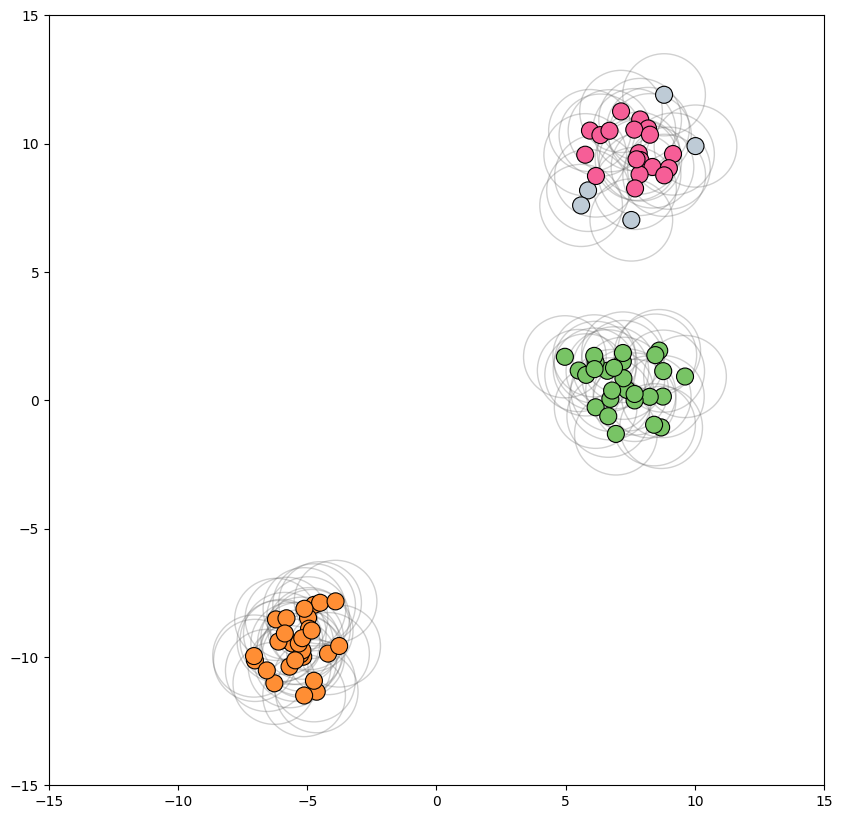

In [70]:
%matplotlib inline
import dbscan_lab_helper as helper

result = np.asarray(a)
helper.plot_clustered_dataset(dataset_1, result, neighborhood=True, epsilon=eps)

In [71]:
dataset_2 = pd.read_csv('varied.csv')[:300].values
m = np.asmatrix(dataset_2)
m = m.transpose()

In [72]:
eps = 1.3
min_points = 5
a = dbscan(m, eps, min_points)

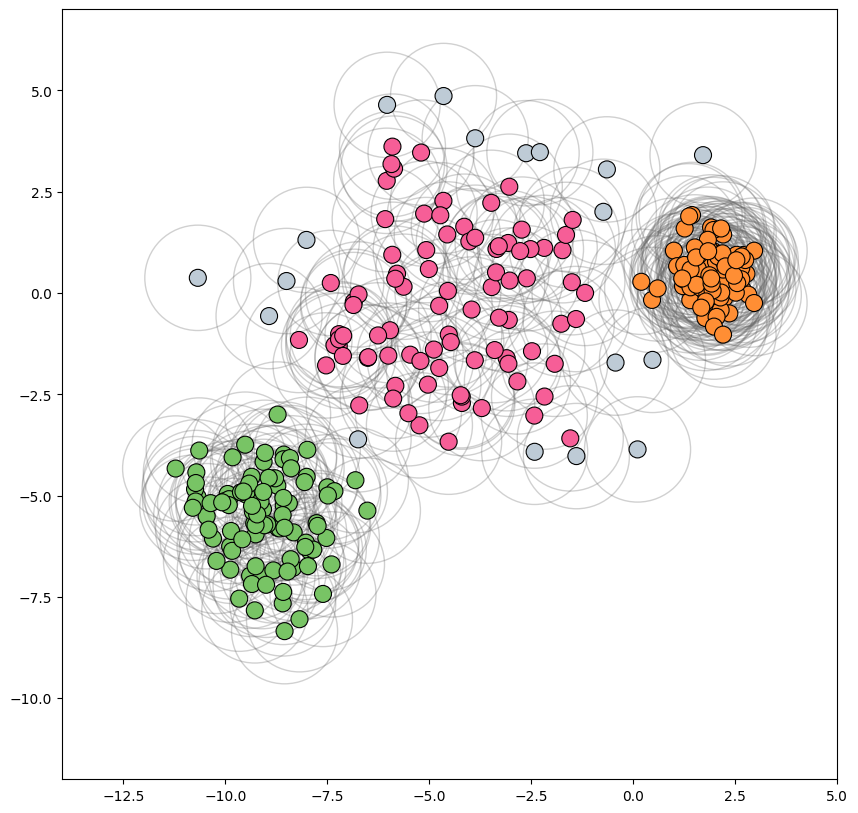

In [73]:
result = np.asarray(a)
helper.plot_clustered_dataset(dataset_2, result, xlim=(-14, 5), ylim=(-12, 7), neighborhood=True, epsilon=eps)
